<center><h1 style="color:#0098E9;"> Capitulo 5: Aproximacion de funciones </h1></center>
<center><h2 style="color:#0098E9;"> Interpolacion </h2></center>
<center><h3 style="color:#0098E9;"> Manuel A. Sánchez</h3></center>
<center><h3 style="color:#0098E9;"> Pontificia Universidad Católica de Chile</h3></center>
<hr style="border:2px solid gray"> </hr>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

# Lagrange

In [2]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from numpy import vander

## Ejemplo: 
$$
x = (-4,2,0,1,3), \quad y = (9,5,1,-1,-5)
$$

In [3]:
# polinomio de Lagrange
def base_Lagrange(j,t,x):
    n = x.size
    Lj = 1.0
    for i in range(n):
        if i != j:
            Lj *= (t-x[i])/(x[j]-x[i])
    return Lj

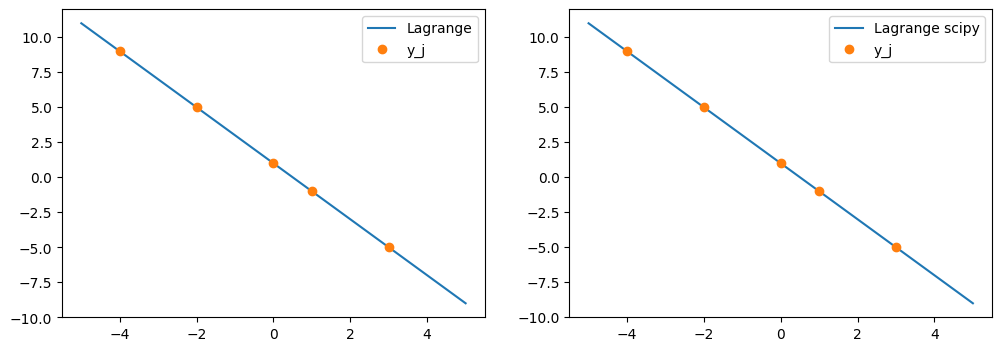

In [45]:
x = np.array([-4.0,-2.0,0,1.0,3.0])

# y = np.array([0.5,1.0,3.0,-1.0,2.0])
y = np.array([9.0,5.0,1.0,-1.0,-5.0])

L0 = lambda t: base_Lagrange(0,t,x)
L1 = lambda t: base_Lagrange(1,t,x)
L2 = lambda t: base_Lagrange(2,t,x)
L3 = lambda t: base_Lagrange(3,t,x)
L4 = lambda t: base_Lagrange(4,t,x)
pn = lambda t: y[0]*L0(t) + y[1]*L1(t) + y[2]*L2(t) + y[3]*L3(t) + y[4]*L4(t)
pn_sp = lagrange(x, y)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(-5,5,100)
ax[0].plot(xplot, pn(xplot),label='Lagrange')
ax[0].plot(x, y, 'o', label='y_j')
ax[1].plot(xplot, pn_sp(xplot),label='Lagrange scipy')
ax[1].plot(x, y, 'o', label='y_j')
ax[0].legend()
ax[1].legend()
plt.show()

## Matriz de Vandermonde

In [48]:
x = np.array([-4.0,-2.0,0,1.0,3.0])
y = np.array([0.5,1.0,3.0,-1.0,2.0])
# y = np.array([9.0,5.0,1.0,-1.0,-5.0])
n = x.size
V = np.zeros((n,n))
for j in range(n):
    for i in range(n):
        V[i,j] = x[i]**j
print(V)
V_numpy = vander(x, increasing=True)
print(V_numpy)

[[  1.  -4.  16. -64. 256.]
 [  1.  -2.   4.  -8.  16.]
 [  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   3.   9.  27.  81.]]
[[  1.  -4.  16. -64. 256.]
 [  1.  -2.   4.  -8.  16.]
 [  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   3.   9.  27.  81.]]


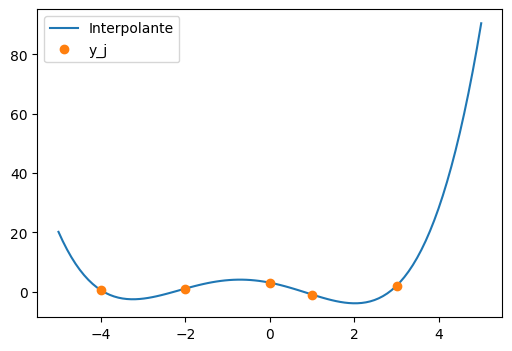

In [49]:
a = np.linalg.solve(V, y)
pn = lambda t: a[0]+a[1]*t + a[2]*t**2 + a[3]*t**3 + a[4]*t**4
fig, ax = plt.subplots(1, 1, figsize=(6,4))
xplot = np.linspace(-5,5,100)
ax.plot(xplot, pn(xplot),label='Interpolante')
ax.plot(x, y, 'o', label='y_j')
ax.legend()
plt.show()

## Ejemplo 1: $f(x) = x^2$

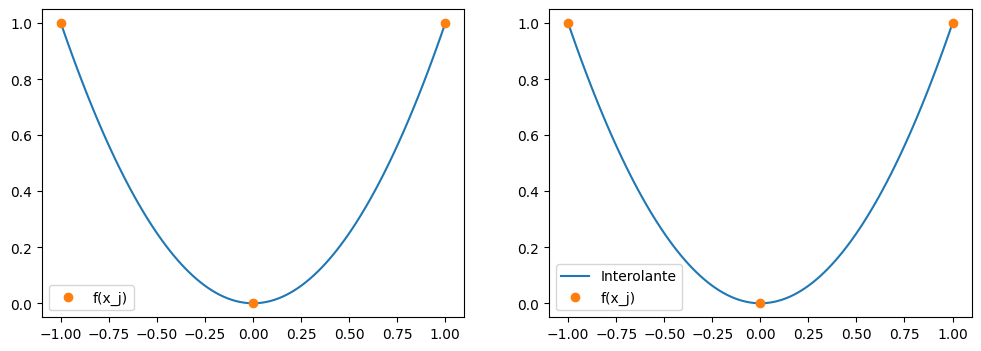

In [21]:
# Interpolation points
a = -1
b = 1
n = 2
x = np.linspace(a,b,n+1)

# function
f = lambda x: x**2

l = lagrange(x,f(x))
V = vander(x, increasing=True)


# Solve the linear system associated to interpolation
sol = np.linalg.solve(V,f(x))

# define interpolant
pn = lambda x: sum([sol[j]*x**j for j in range(n+1)])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a,b,100)
axs[0].plot(xplot, l(xplot))
axs[0].plot(x, f(x),'o', label='f(x_j)')
axs[1].plot(xplot, pn(xplot), label='Interolante')
axs[1].plot(x, f(x),'o', label='f(x_j)')
axs[0].legend()
axs[1].legend()
plt.show()

## Ejemplo 2: $f(x) = x^{2/3}$

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


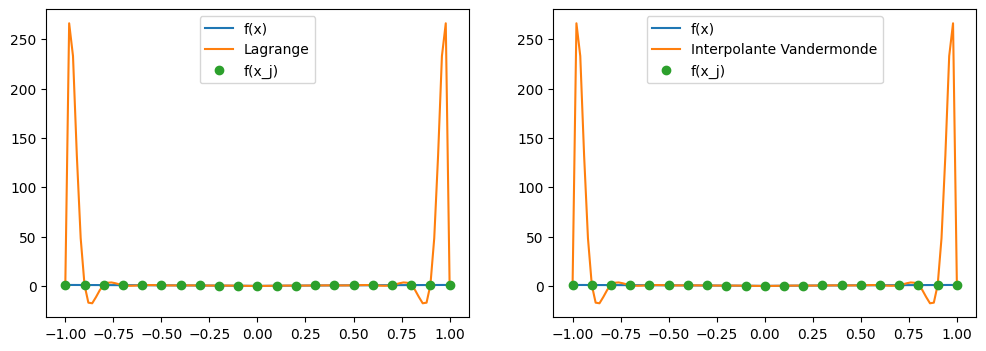

In [52]:
# Interpolation points
a = -1
b = 1
n = 20
x = np.linspace(a,b,n+1)
print(x)
# function
f2 = lambda x: (x**(2.0))**(1.0/3.0)

l = lagrange(x,f2(x))
V = vander(x, increasing=True)


# Solve the linear system associated to interpolation
sol = np.linalg.solve(V,f2(x))

# define interpolant
s2 = lambda x: sum([sol[j]*x**j for j in range(n+1)])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a, b, 101)
axs[0].plot(xplot, f2(xplot), label='f(x)')
axs[0].plot(xplot, l(xplot), label='Lagrange')
axs[0].plot(x, f2(x),'o', label='f(x_j)')
axs[0].legend()
axs[1].plot(xplot, f2(xplot), label='f(x)')
axs[1].plot(xplot, s2(xplot), label='Interpolante Vandermonde')
axs[1].plot(x, f2(x),'o', label='f(x_j)')
axs[1].legend()
plt.show()

In [28]:
# Error
error = np.max(np.abs(f2(xplot)-l(xplot)))
print("Error maximo en una malla fina de 101 puntos:", error) 

Error maximo en una malla fina de 101 puntos: 1.4886193254330715


## Ejemplo 3: 
$$f(x) = \cos(x)^3, \quad x\in [-3,3]$$

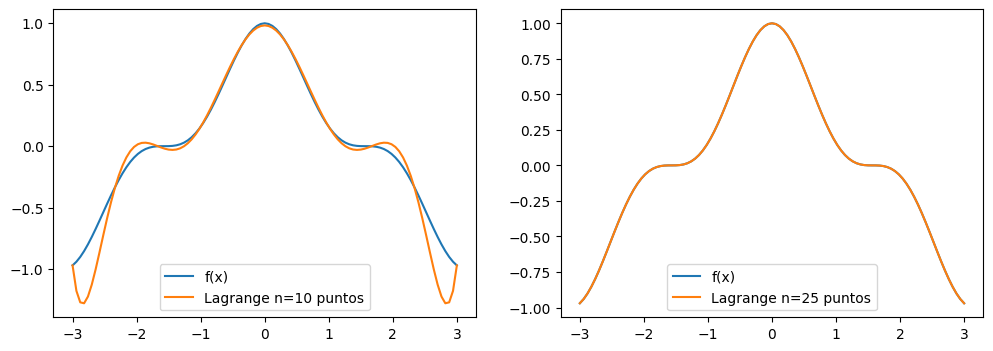

Error maximo de L10 en una malla fina de 101 puntos: 0.42469555865909503
Error maximo de L25 en una malla fina de 101 puntos: 0.0005416108615894366


In [33]:
# Interpolation points
a = -3
b = 3
x10 = np.linspace(a,b,10)
x25 = np.linspace(a,b,25)
# function
f3 = lambda x: np.cos(x)**3
l10 = lagrange(x10,f3(x10))
l25 = lagrange(x25,f3(x25))

fig, axs = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(a, b, 101)
axs[0].plot(xplot, f3(xplot), label='f(x)')
axs[0].plot(xplot, l10(xplot), label='Lagrange n=10 puntos')
axs[0].legend()
axs[1].plot(xplot, f3(xplot),  label='f(x)')
axs[1].plot(xplot, l25(xplot), label='Lagrange n=25 puntos')
axs[1].legend()
plt.show()

# Error
error10 = np.max(np.abs(f3(xplot)-l10(xplot)))
error25 = np.max(np.abs(f3(xplot)-l25(xplot)))
print("Error maximo de L10 en una malla fina de 101 puntos:", error10) 
print("Error maximo de L25 en una malla fina de 101 puntos:", error25) 

## Forma de Newton de un polinomio de interpolacion

In [43]:
def calcular_diferencias_divididas(x, y):
    n = x.size
    coefficients = np.array(y, dtype=float)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            # Formula: f[x_i, ..., x_{i-j}] = (f[x_i, ...] - f[x_{i-1}, ...]) / (x_i - x_{i-j})
            numerator = coefficients[i] - coefficients[i-1]
            denominator = x[i] - x[i-j]
            if denominator == 0:
                raise ValueError("valores de x duplicados, division por cero.")
            coefficients[i] = numerator / denominator
    return coefficients
    
def W(x):
    n = x.size()
    W = 1.0
    for j in range(n):
        W *= (x-x[j])
    return W

x = np.array([-4.0,-2.0,0,1.0,3.0])
y = np.array([0.5,1.0,3.0,-1.0,2.0])

def Newton_interpolante(x,coefficients,t):
    n = len(coefficients)
    result = coefficients[n-1]
    
    for i in range(n - 2, -1, -1):
        result = coefficients[i] + (t - x[i]) * result
        
    return result
    

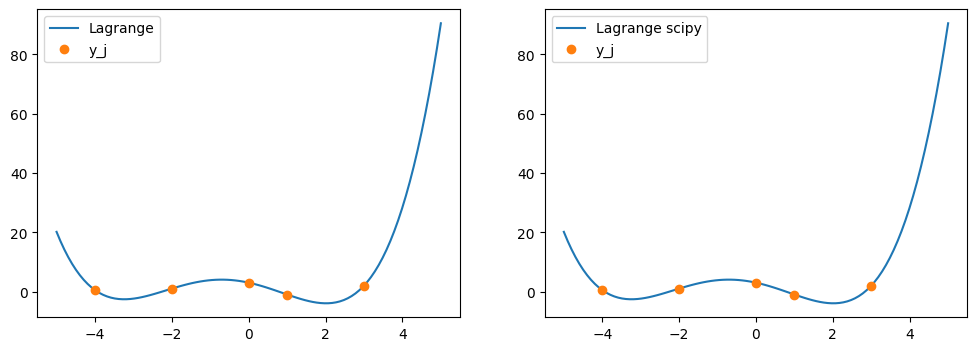

In [44]:
x = np.array([-4.0,-2.0,0,1.0,3.0])

y = np.array([0.5,1.0,3.0,-1.0,2.0])

ff= calcular_diferencias_divididas(x, y)
pn = lambda t: Newton_interpolante(x,ff,t)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
xplot = np.linspace(-5,5,100)
ax[0].plot(xplot, pn(xplot),label='Lagrange')
ax[0].plot(x, y, 'o', label='y_j')
ax[1].plot(xplot, pn_sp(xplot),label='Lagrange scipy')
ax[1].plot(x, y, 'o', label='y_j')
ax[0].legend()
ax[1].legend()
plt.show()

## Polinomios de Tchebychev

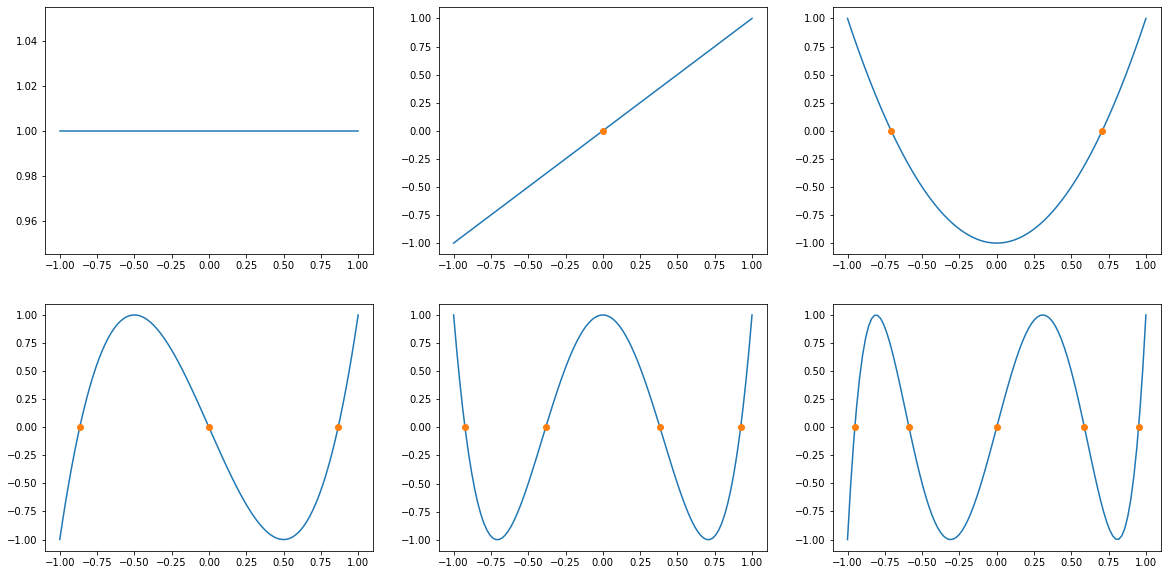

In [41]:
# Tchebyshev zeros T_k
T_0 = lambda x: 1.0 + 0*x
T_1 = lambda x: x
T_2 = lambda x: 2*x*T_1(x) - T_0(x)
T_3 = lambda x: 2*x*T_2(x) - T_1(x)
T_4 = lambda x: 2*x*T_3(x) - T_2(x)
T_5 = lambda x: 2*x*T_4(x) - T_3(x)

fig, axs = plt.subplots(2, 3, figsize=(20,10))
xplot = np.linspace(-1,1,100)
list_plot = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
T_chev = [T_0, T_1, T_2, T_3, T_4, T_5]
for k in range(6):
    axs[list_plot[k][0],list_plot[k][1]].plot(xplot, T_chev[k](xplot))
# end for

# zeros en [-1,1]
def Tchebychev_zeros(k):
    z = np.zeros(k)
    for i in range(k):
        z[i] = np.cos((2.0*i+1)*np.pi/(2.0*k)) 
    #end for
    return z

# zeros 
for k in range(1,6):
    z = Tchebychev_zeros(k)
    axs[list_plot[k][0], list_plot[k][1]].plot(z, T_chev[k](z),'o')

plt.show()

## Ejemplo 2: $f(x) = x^{2/3}$ con Tchebychev

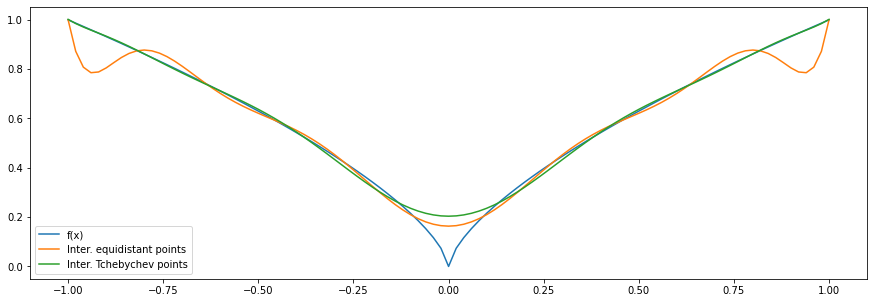

In [42]:
# Interpolation points
a = -1
b = 1
n = 11
x = np.linspace(a,b,n+1)

# function
f2 = lambda x: (x**(2.0))**(1.0/3.0)

# Vandermonde Matrix
V = vander(x, increasing=True)
np.set_printoptions(precision=3)
# linear system equidistant points
sol2 = np.linalg.solve(V,f2(x))
s2 = lambda x: sum([sol2[j]*x**j for j in range(n+1)]) 

# linear system tchebichev points
z = Tchebychev_zeros(n+1)
Vz = vander(z, increasing=True)
sol2_T = np.linalg.solve(Vz,f2(z))
s2_T = lambda x: sum([sol2_T[j]*x**j for j in range(n+1)])
fig, axs = plt.subplots(1, 1, figsize=(15,5))
xplot = np.linspace(a, b, 101)
axs.plot(xplot, f2(xplot))
axs.plot(xplot, s2(xplot))
#axs[1].plot(xplot, f2(xplot))
axs.plot(xplot, s2_T(xplot))
axs.legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])
plt.show()

## Ejemplo 4: $f(x) = exp(3x)$

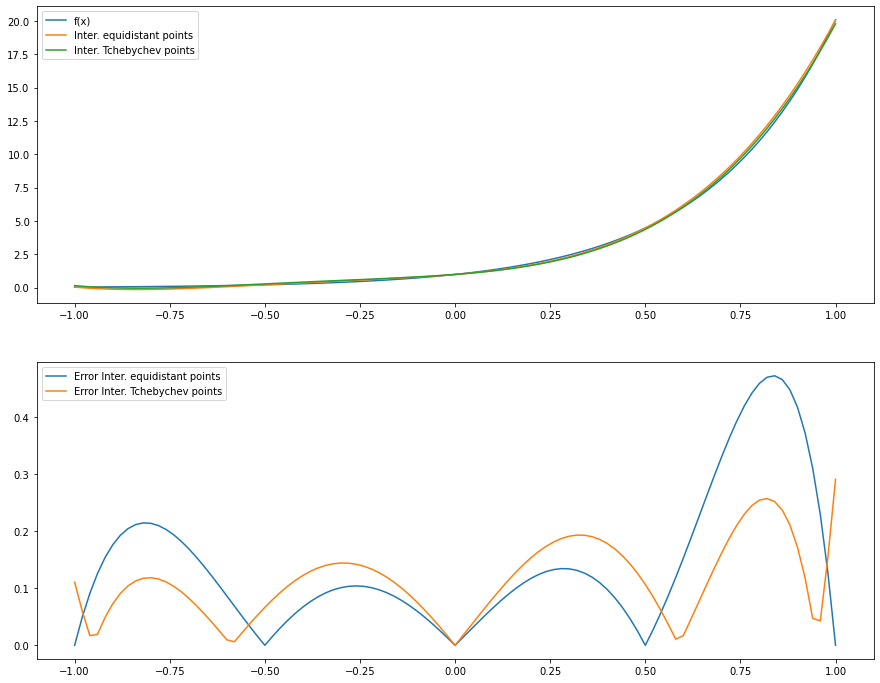

Error using equidistant points at 0.8: 0.45910505807948
Error using Tchebychev points at 0.8: 0.25439660001006104


In [43]:
f4 = lambda x: np.exp(3*x)
n = 4
# Equidistant points
x = np.linspace(-1, 1, n+1)
V = vander(x, increasing=True)
sol4 = np.linalg.solve(V,f4(x))
s4 = lambda x: sum([sol4[j]*x**j for j in range(n+1)]) #lambda t: InterpolantMonomial(t,sol4)

# Tchebychev poitns
z = Tchebychev_zeros(n+1)
Vz = vander(z,  increasing=True)
sol4_T = np.linalg.solve(Vz,f4(z))
s4_T = lambda x: sum([sol4_T[j]*x**j for j in range(n+1)]) #lambda t: InterpolantMonomial(t,sol4_T)

# plots
fig, axs = plt.subplots(2, 1, figsize=(15,12))
xplot = np.linspace(-1, 1, 101)
axs[0].plot(xplot, f4(xplot))
axs[0].plot(xplot, s4(xplot))
axs[0].plot(xplot, s4_T(xplot))
axs[0].legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])


axs[1].plot(xplot, abs(f4(xplot)-s4(xplot)))
axs[1].plot(xplot, abs(f4(xplot)-s4_T(xplot)))
axs[1].legend(['Error Inter. equidistant points','Error Inter. Tchebychev points'])
plt.show()


print("Error using equidistant points at 0.8:", abs(f4(0.8) - s4(0.8)))
print("Error using Tchebychev points at 0.8:", abs(f4(0.8) - s4_T(0.8)))

## Example 3: $f(x) = cos(x)^3$ with Tchebychev

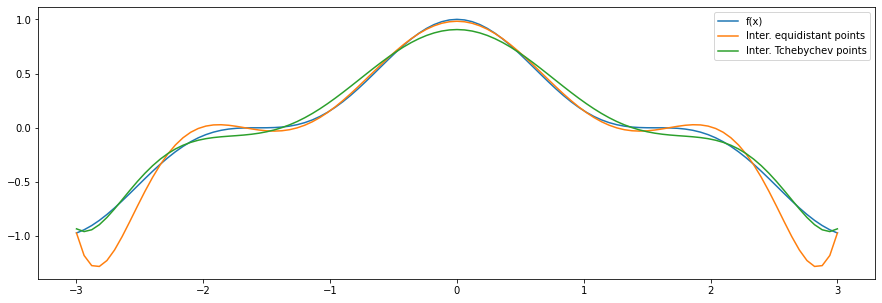

In [46]:
# Interpolation points
a = -3
b = 3
n = 9
x = np.linspace(a,b,n+1)

# function
f3 = lambda x: np.cos(x)**3


# Vandermonde Matrix
V = vander(x, increasing=True)
np.set_printoptions(precision=3)
# linear system equidistant points
sol3 = np.linalg.solve(V,f3(x))
s3 = lambda x: sum([sol3[j]*x**j for j in range(n+1)]) 

# linear system tchebychev points
zt = Tchebychev_zeros(n+1)
z = (b-a)*zt/2+(b-a)/2 + a
Vz = vander(z, increasing=True)
sol3_T = np.linalg.solve(Vz,f3(z))
s3_T =lambda x: sum([sol3_T[j]*x**j for j in range(n+1)]) 
fig, axs = plt.subplots(1, 1, figsize=(15,5))
xplot = np.linspace(a, b, 101)
axs.plot(xplot, f3(xplot))
axs.plot(xplot, s3(xplot))
axs.plot(xplot, s3_T(xplot))
axs.legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])
plt.show()

## Example 5: Runge function

$$
f(x) = \frac{1}{1+25x^{2}}
$$

Comparison equidistant points vs Tchebychev points.

Interpolation with equdistant points diver

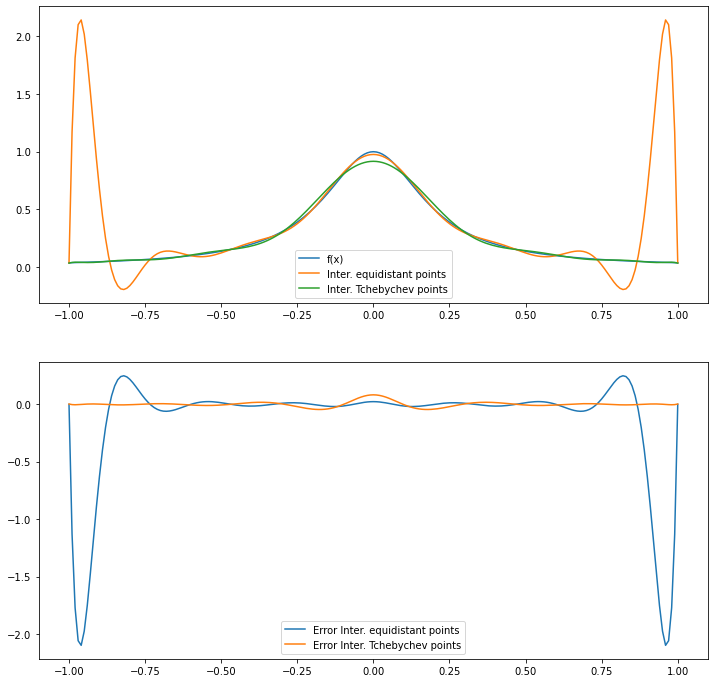

In [57]:
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 15
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)
V = vander(x, increasing=True)
sol_runge = np.linalg.solve(V,f_runge(x))
s_runge = lambda x: sum([sol_runge[j]*x**j for j in range(n+1)])#lambda t: InterpolantMonomial(t,sol_runge)

# interpolation with Tchebychev points
z = Tchebychev_zeros(n+1)
Vz = vander(z, increasing=True)
sol_rungeT = np.linalg.solve(Vz,f_runge(z))
s_rungeT = lambda x: sum([sol_rungeT[j]*x**j for j in range(n+1)])#lambda t: InterpolantMonomial(t,sol_rungeT)

# plots
fig, axs = plt.subplots(2, 1, figsize=(12,12))
xplot = np.linspace(-1, 1, 201)
axs[0].plot(xplot, f_runge(xplot))
axs[0].plot(xplot, s_runge(xplot))
axs[0].plot(xplot, s_rungeT(xplot))
axs[0].legend(['f(x)','Inter. equidistant points','Inter. Tchebychev points'])


axs[1].plot(xplot, f_runge(xplot)-s_runge(xplot))
axs[1].plot(xplot, f_runge(xplot)-s_rungeT(xplot))
axs[1].legend(['Error Inter. equidistant points','Error Inter. Tchebychev points'])
#plt.show()


In [53]:
from sympy import *
x = symbols('x')
f = 1/(1+25*x**2)
f_der = f

n = 11
t0 = 0.1
for j in range(1,n+2):
    f_der = diff(f_der,x)
    f_der_at0 = f_der.subs(x,t0)
    #print("f^(n+1):", f_der_at0)
    h = 2/(j+1)
    C = h**(j+1)/(4*(j+1))
    #print("C:", C)
    print("C*f^(", n,")", C*f_der_at0)


C*f^( 11 ) -0.400000000000000
C*f^( 11 ) -0.158024691358025
C*f^( 11 ) 1.80000000000000
C*f^( 11 ) -2.98844160000000
C*f^( 11 ) -3.86282578875170
C*f^( 11 ) 28.4434921517673
C*f^( 11 ) -41.3437500000001
C*f^( 11 ) -108.825281587005
C*f^( 11 ) 592.830309335041
C*f^( 11 ) -640.639235496136
C*f^( 11 ) -3222.24051211706
C*f^( 11 ) 13798.1963526921


## Hermite interpolation

### Ejemplo. (Burden p.101)

p(x) = 
                        5                       4                       3      
- 0.00277469135832575⋅x  + 0.0240317901257185⋅x  - 0.0145560802548061⋅x  - 0.2

                2                                           
35216169739942⋅x  - 0.00822922346651467⋅x + 1.00194406469473


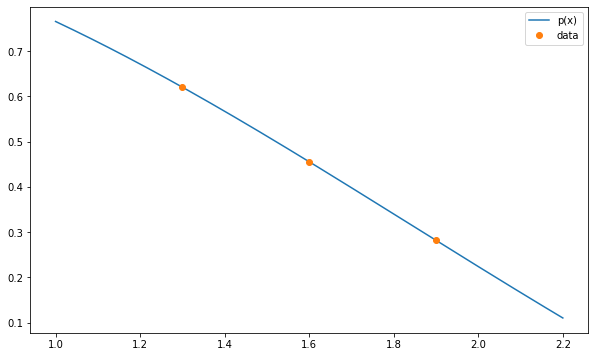

In [58]:
from sympy import *
x = symbols('x')
xi  = [1.3,1.6,1.9]
fi  = [0.6200860, 0.4554022, 0.2818186]
dfi = [-0.5220232, -0.5698959, -0.5811571]

# Lagrange polynomials
l0 = (x-xi[1])*(x-xi[2])/((xi[0]-xi[1])*(xi[0]-xi[2]))
l1 = (x-xi[0])*(x-xi[2])/((xi[1]-xi[0])*(xi[1]-xi[2]))
l2 = (x-xi[1])*(x-xi[0])/((xi[2]-xi[0])*(xi[2]-xi[1]))

dl0 = diff(l0,x)
dl1 = diff(l1,x)
dl2 = diff(l2,x)

dl0atx0 = dl0.subs(x,xi[0])
dl1atx1 = dl1.subs(x,xi[1])
dl2atx2 = dl2.subs(x,xi[2])

# H
H0 = (1-2*(x-xi[0])*dl0atx0)*l0**2
H1 = (1-2*(x-xi[1])*dl1atx1)*l1**2
H2 = (1-2*(x-xi[2])*dl2atx2)*l2**2

# Hhat
Hhat0 = (x-xi[0])*l0**2
Hhat1 = (x-xi[1])*l1**2
Hhat2 = (x-xi[2])*l2**2

p = fi[0]*H0 + fi[1]*H1 + fi[2]*H2 + dfi[0]*Hhat0 + dfi[1]*Hhat1 + dfi[2]*Hhat2

init_printing()
print("p(x) = \n", pretty(simplify(p)))

#print(p.subs(x,1.5))


np.set_printoptions(precision=3)
fig, axs = plt.subplots(1, 1, figsize=(10,6))
xplot = np.linspace(1, 2.2, 200)
pplot = [p.subs(x, xplot[i]) for i in range(xplot.size)]
axs.plot(xplot, pplot)
axs.plot(xi, fi, 'o')
axs.legend(['p(x)', 'data'])


## Piecewise interpolation

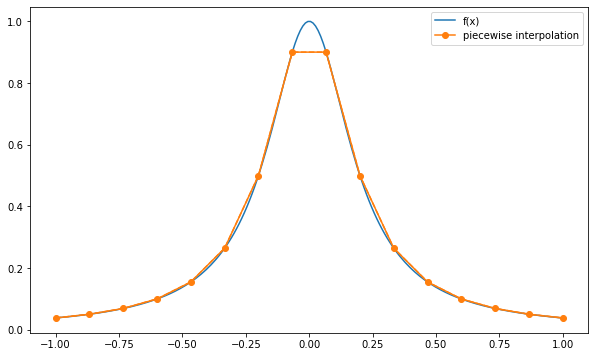

In [6]:
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 15
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)

fig, axs = plt.subplots(1, 1, figsize=(10,6))
xplot = np.linspace(-1, 1, 200)

If = lambda t: np.interp(t, x, f_runge(x))
axs.plot(xplot, f_runge(xplot))
axs.plot(x, If(x), 'C01', marker='o')
axs.plot(xplot, If(xplot), '--')
axs.legend(['f(x)', 'piecewise interpolation'])

## Spline cubica

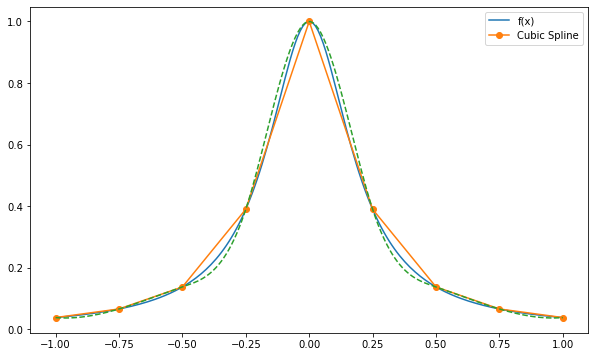

In [8]:
from scipy.interpolate import CubicSpline
f_runge = lambda x: 1.0/(1.0+25*x**2)
n = 8
# interpolation with equidistant points
x = np.linspace(-1, 1, n+1)

fig, axs = plt.subplots(1, 1, figsize=(10,6))
xplot = np.linspace(-1, 1, 200)

S = CubicSpline( x, f_runge(x))
axs.plot(xplot, f_runge(xplot))
axs.plot(x, S(x), marker='o')
axs.plot(xplot, S(xplot), '--')
axs.legend(['f(x)', 'Cubic Spline'])



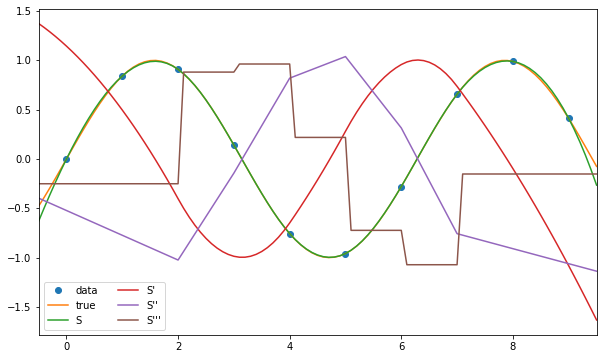

In [9]:
x = np.arange(10)
y = np.sin(x)
S = CubicSpline( x, y)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
xplot = np.arange(-0.5, 9.6, 0.1)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, np.sin(xplot), label='true')
ax.plot(xplot, S(xplot), label="S")
ax.plot(xplot, S(xplot, 1), label="S'")
ax.plot(xplot, S(xplot, 2), label="S''")
ax.plot(xplot, S(xplot, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

##  Example 'duck' (Burden p. 118) 

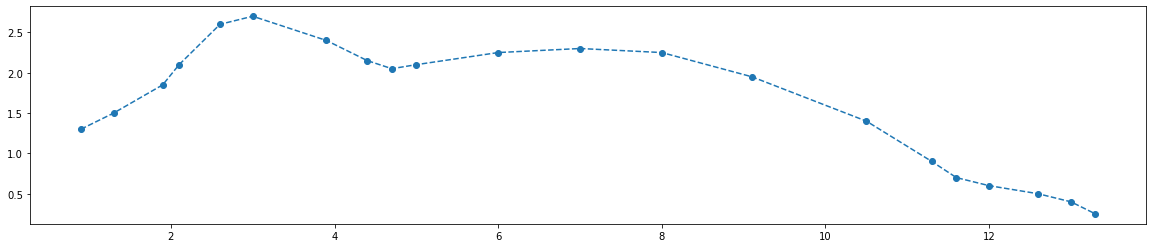

In [23]:
x = [0.9, 1.3, 1.9 , 2.1, 2.6, 3.0, 3.9, 4.4 , 4.7 , 5.0, 6.0 , 7.0, 8.0 , 9.1, 10.5, 11.3, 11.6, 12.0, 12.6,13.0,13.3]
y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7 , 0.6 , 0.5 , 0.4 , 0.25]
fig, ax = plt.subplots(1, 1, figsize=(20,4))
plt.plot(x,y,'o--')
#ax.set_ylim(-6, 4)

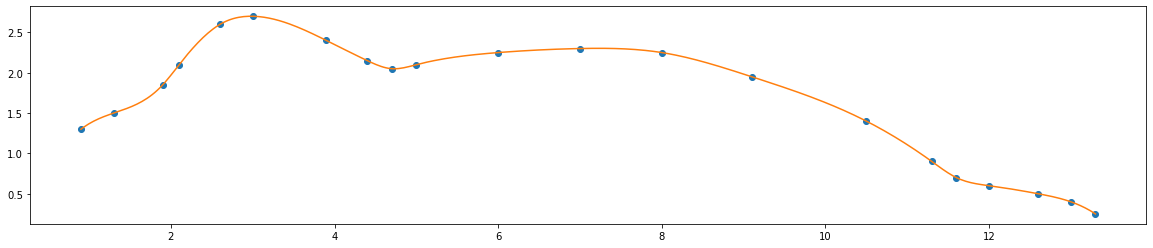

In [24]:
# Spline
S = CubicSpline( x, y)
fig, ax = plt.subplots(1, 1, figsize=(20,4))
xplot = np.linspace(x[0], x[-1], 400)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, S(xplot), label="S")

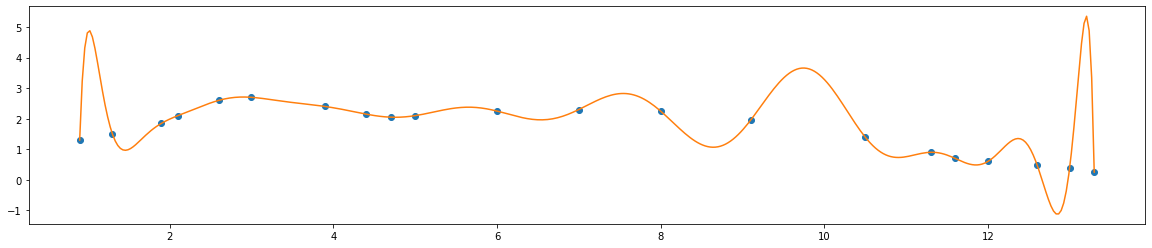

In [25]:
from scipy.interpolate import BarycentricInterpolator
In = BarycentricInterpolator(x,y)
fig, ax = plt.subplots(1, 1, figsize=(20,4))
xplot = np.linspace(x[0], x[-1], 400)
ax.plot(x, y, 'o', label='data')
ax.plot(xplot, In(xplot), label="S")

## Example: Airfoil
![sdf](airfoil_plane.png) $\quad$ ![sdfs](airfoil_physics.jpg)


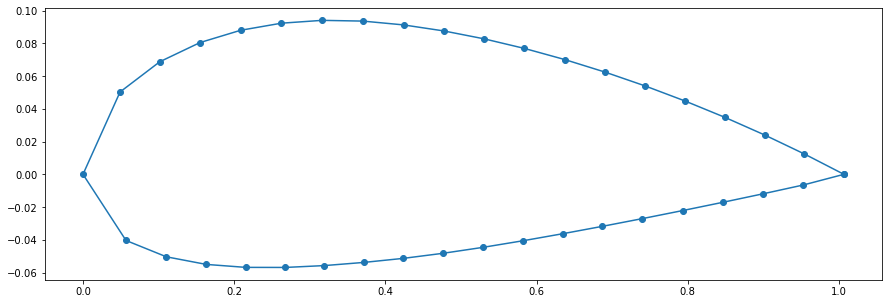

In [28]:
# airfoil NACA 4-digit series, NACA 2415 airfoil 
filename = 'airfoil_NACA2415.dat'
header = "parameter s, X-Column, Y-Column"
data = np.loadtxt(filename)
s = data[:, 0]
x_air = data[:, 1]
y_air = data[:, 2]

fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.plot(x_air, y_air,'o-')
plt.show()


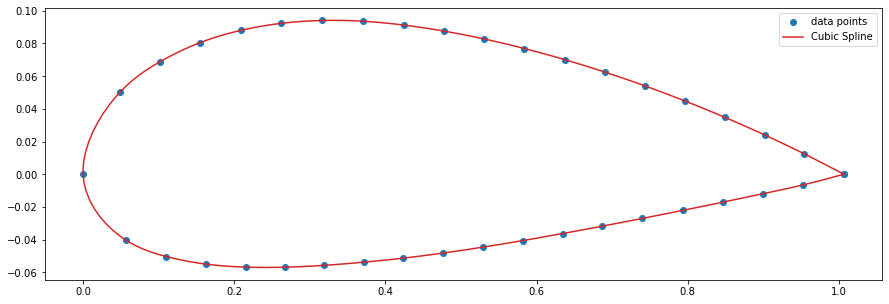

In [27]:
CS_airfoil = CubicSpline(s,np.c_[x_air,y_air], bc_type='natural')
xplot = np.linspace(0, np.max(s), 200)
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.plot(x_air, y_air,'o')
axs.plot(CS_airfoil(xplot)[:,0], CS_airfoil(xplot)[:,1], 'C03')
axs.legend(['data points','Cubic Spline'])

